Library Imports

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from keras.datasets import mnist
# from ksvd import Approximate KSVD
from sparselandtools.dictionaries import Dictionary
from sparselandtools.learning import ApproximateKSVD
from sparselandtools.pursuits import OrthogonalMatchingPursuit, Pursuit, MatchingPursuit, LassoP

from sklearn.feature_extraction.image import extract_patches_2d, reconstruct_from_patches_2d

In [4]:
# Langevin wrapper for KSVD library
class lang(Pursuit):
	def fit(self, y):
		sigma=self.tol
		X = self.D
		
		# def omega_bar(t):
		# 	return t ** 2 * (t <= 1) + (2 * np.abs(t) - 1) * (t > 1)

		norm = np.linalg.norm(X, ord='fro')
		beta = 4 * sigma * sigma
		tau = 4 * sigma / norm
		T = X.shape[0]
		h = beta / norm ** 2

		L = np.zeros(X.shape[1])
		lambd = np.zeros_like(L)
		H = 0
		errs = []

		XX = X.T @ X
		Xy = X.T @ y
		i = 0
		while H < T:
			i+=1
			nablaV = (2 / beta) * (Xy - XX @ L)
			nablaV = nablaV - 4 * L / (tau ** 2 + L ** 2)
			L = L + h * nablaV + np.sqrt(2 * h) * np.random.normal(0, 1, L.shape)
			H = H + 1
			lambd = lambd + h * L / T
		return lambd / h

Play around with these parameters

In [5]:
patch_shape = (28, 28)
n = np.prod(patch_shape)
k = 100
N = 5000
shape_Y = (n, N)
shape_D = (n, k)
shape_X = (k, N)
sigma_data = 0.01

Generate Training and Testing split on patches

In [6]:
# Extract N random patches from mnist dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()
# mnist_imgs = np.concatenate((train_X, test_X))

img_shape = train_X[0].shape
rnd_imgs = train_X[np.random.choice(train_X.shape[0], N, replace=False)]

patches = []
for img in rnd_imgs:
	many = extract_patches_2d(img, patch_shape)
	patch = many[np.random.randint(0, len(many))]
	# while np.linalg.norm(patch) < 1e-3:
	# 	patch = many[np.random.randint(0, len(many))]
	patches.append(patch)	
patches = np.array(patches)
# patches = rnd_imgs
	

In [7]:
# Generate Y ~ D X were each vector in Y is a random patch
Y = patches.reshape((N, -1)).T
Y = Y / (np.linalg.norm(Y, axis=0) + 1e-6)

D_est = np.random.normal(-1, 1, shape_D)
D_est = D_est / np.linalg.norm(D_est, axis=0)
X_est = np.zeros(shape_X)

ksvd = ApproximateKSVD(
				dictionary=Dictionary(D_est), 
				pursuit=lang, 
				sparsity=None,
				noise_gain=1e-1, 
				sigma=sigma_data)

ksvd.fit(Y, iter=60)
D_est = ksvd.dictionary.matrix

INFO:root:Start iteration 1
INFO:root:Entering sparse coding stage...


(784, 100) (784, 5000) 0.0004


INFO:root:Sparse coding stage ended.
INFO:root:Start iteration 2
INFO:root:Entering sparse coding stage...


(784, 100) (784, 5000) 0.0004


INFO:root:Sparse coding stage ended.
INFO:root:Start iteration 3
INFO:root:Entering sparse coding stage...


(784, 100) (784, 5000) 0.0004


INFO:root:Sparse coding stage ended.
INFO:root:Start iteration 4
INFO:root:Entering sparse coding stage...


(784, 100) (784, 5000) 0.0004


INFO:root:Sparse coding stage ended.
INFO:root:Start iteration 5
INFO:root:Entering sparse coding stage...


(784, 100) (784, 5000) 0.0004


INFO:root:Sparse coding stage ended.
INFO:root:Start iteration 6
INFO:root:Entering sparse coding stage...


(784, 100) (784, 5000) 0.0004


INFO:root:Sparse coding stage ended.
INFO:root:Start iteration 7
INFO:root:Entering sparse coding stage...


(784, 100) (784, 5000) 0.0004


INFO:root:Sparse coding stage ended.
INFO:root:Start iteration 8
INFO:root:Entering sparse coding stage...


(784, 100) (784, 5000) 0.0004


INFO:root:Sparse coding stage ended.
INFO:root:Start iteration 9
INFO:root:Entering sparse coding stage...


(784, 100) (784, 5000) 0.0004


INFO:root:Sparse coding stage ended.
INFO:root:Start iteration 10
INFO:root:Entering sparse coding stage...


(784, 100) (784, 5000) 0.0004


INFO:root:Sparse coding stage ended.
INFO:root:Start iteration 11
INFO:root:Entering sparse coding stage...


(784, 100) (784, 5000) 0.0004


INFO:root:Sparse coding stage ended.
INFO:root:Start iteration 12
INFO:root:Entering sparse coding stage...


(784, 100) (784, 5000) 0.0004


INFO:root:Sparse coding stage ended.
INFO:root:Start iteration 13
INFO:root:Entering sparse coding stage...


(784, 100) (784, 5000) 0.0004


INFO:root:Sparse coding stage ended.
INFO:root:Start iteration 14
INFO:root:Entering sparse coding stage...


(784, 100) (784, 5000) 0.0004


INFO:root:Sparse coding stage ended.
INFO:root:Start iteration 15
INFO:root:Entering sparse coding stage...


(784, 100) (784, 5000) 0.0004


INFO:root:Sparse coding stage ended.
INFO:root:Start iteration 16
INFO:root:Entering sparse coding stage...


(784, 100) (784, 5000) 0.0004


INFO:root:Sparse coding stage ended.
INFO:root:Start iteration 17
INFO:root:Entering sparse coding stage...


(784, 100) (784, 5000) 0.0004


INFO:root:Sparse coding stage ended.
INFO:root:Start iteration 18
INFO:root:Entering sparse coding stage...


(784, 100) (784, 5000) 0.0004


INFO:root:Sparse coding stage ended.
INFO:root:Start iteration 19
INFO:root:Entering sparse coding stage...


(784, 100) (784, 5000) 0.0004


INFO:root:Sparse coding stage ended.
INFO:root:Start iteration 20
INFO:root:Entering sparse coding stage...


(784, 100) (784, 5000) 0.0004


INFO:root:Sparse coding stage ended.
INFO:root:Start iteration 21
INFO:root:Entering sparse coding stage...


(784, 100) (784, 5000) 0.0004


INFO:root:Sparse coding stage ended.
INFO:root:Start iteration 22
INFO:root:Entering sparse coding stage...


(784, 100) (784, 5000) 0.0004


INFO:root:Sparse coding stage ended.
INFO:root:Start iteration 23
INFO:root:Entering sparse coding stage...


(784, 100) (784, 5000) 0.0004


INFO:root:Sparse coding stage ended.
INFO:root:Start iteration 24
INFO:root:Entering sparse coding stage...


(784, 100) (784, 5000) 0.0004


INFO:root:Sparse coding stage ended.
INFO:root:Start iteration 25
INFO:root:Entering sparse coding stage...


(784, 100) (784, 5000) 0.0004


INFO:root:Sparse coding stage ended.
INFO:root:Start iteration 26
INFO:root:Entering sparse coding stage...


(784, 100) (784, 5000) 0.0004


INFO:root:Sparse coding stage ended.
INFO:root:Start iteration 27
INFO:root:Entering sparse coding stage...


(784, 100) (784, 5000) 0.0004


INFO:root:Sparse coding stage ended.
INFO:root:Start iteration 28
INFO:root:Entering sparse coding stage...


(784, 100) (784, 5000) 0.0004


INFO:root:Sparse coding stage ended.
INFO:root:Start iteration 29
INFO:root:Entering sparse coding stage...


(784, 100) (784, 5000) 0.0004


INFO:root:Sparse coding stage ended.
INFO:root:Start iteration 30
INFO:root:Entering sparse coding stage...


(784, 100) (784, 5000) 0.0004


INFO:root:Sparse coding stage ended.
INFO:root:Start iteration 31
INFO:root:Entering sparse coding stage...


(784, 100) (784, 5000) 0.0004


INFO:root:Sparse coding stage ended.
INFO:root:Start iteration 32
INFO:root:Entering sparse coding stage...


(784, 100) (784, 5000) 0.0004


INFO:root:Sparse coding stage ended.
INFO:root:Start iteration 33
INFO:root:Entering sparse coding stage...


(784, 100) (784, 5000) 0.0004


INFO:root:Sparse coding stage ended.
INFO:root:Start iteration 34
INFO:root:Entering sparse coding stage...


(784, 100) (784, 5000) 0.0004


INFO:root:Sparse coding stage ended.
INFO:root:Start iteration 35
INFO:root:Entering sparse coding stage...


(784, 100) (784, 5000) 0.0004


INFO:root:Sparse coding stage ended.
INFO:root:Start iteration 36
INFO:root:Entering sparse coding stage...


(784, 100) (784, 5000) 0.0004


INFO:root:Sparse coding stage ended.
INFO:root:Start iteration 37
INFO:root:Entering sparse coding stage...


(784, 100) (784, 5000) 0.0004


INFO:root:Sparse coding stage ended.
INFO:root:Start iteration 38
INFO:root:Entering sparse coding stage...


(784, 100) (784, 5000) 0.0004


INFO:root:Sparse coding stage ended.
INFO:root:Start iteration 39
INFO:root:Entering sparse coding stage...


(784, 100) (784, 5000) 0.0004


INFO:root:Sparse coding stage ended.
INFO:root:Start iteration 40
INFO:root:Entering sparse coding stage...


(784, 100) (784, 5000) 0.0004


INFO:root:Sparse coding stage ended.
INFO:root:Start iteration 41
INFO:root:Entering sparse coding stage...


(784, 100) (784, 5000) 0.0004


INFO:root:Sparse coding stage ended.
INFO:root:Start iteration 42
INFO:root:Entering sparse coding stage...


(784, 100) (784, 5000) 0.0004


INFO:root:Sparse coding stage ended.
INFO:root:Start iteration 43
INFO:root:Entering sparse coding stage...


(784, 100) (784, 5000) 0.0004


INFO:root:Sparse coding stage ended.
INFO:root:Start iteration 44
INFO:root:Entering sparse coding stage...


(784, 100) (784, 5000) 0.0004


INFO:root:Sparse coding stage ended.
INFO:root:Start iteration 45
INFO:root:Entering sparse coding stage...


(784, 100) (784, 5000) 0.0004


INFO:root:Sparse coding stage ended.
INFO:root:Start iteration 46
INFO:root:Entering sparse coding stage...


(784, 100) (784, 5000) 0.0004


INFO:root:Sparse coding stage ended.
INFO:root:Start iteration 47
INFO:root:Entering sparse coding stage...


(784, 100) (784, 5000) 0.0004


INFO:root:Sparse coding stage ended.
INFO:root:Start iteration 48
INFO:root:Entering sparse coding stage...


(784, 100) (784, 5000) 0.0004


INFO:root:Sparse coding stage ended.
INFO:root:Start iteration 49
INFO:root:Entering sparse coding stage...


(784, 100) (784, 5000) 0.0004


INFO:root:Sparse coding stage ended.
INFO:root:Start iteration 50
INFO:root:Entering sparse coding stage...


(784, 100) (784, 5000) 0.0004


INFO:root:Sparse coding stage ended.
INFO:root:Start iteration 51
INFO:root:Entering sparse coding stage...


(784, 100) (784, 5000) 0.0004


INFO:root:Sparse coding stage ended.
INFO:root:Start iteration 52
INFO:root:Entering sparse coding stage...


(784, 100) (784, 5000) 0.0004


INFO:root:Sparse coding stage ended.
INFO:root:Start iteration 53
INFO:root:Entering sparse coding stage...


(784, 100) (784, 5000) 0.0004


INFO:root:Sparse coding stage ended.
INFO:root:Start iteration 54
INFO:root:Entering sparse coding stage...


(784, 100) (784, 5000) 0.0004


INFO:root:Sparse coding stage ended.
INFO:root:Start iteration 55
INFO:root:Entering sparse coding stage...


(784, 100) (784, 5000) 0.0004


INFO:root:Sparse coding stage ended.
INFO:root:Start iteration 56
INFO:root:Entering sparse coding stage...


(784, 100) (784, 5000) 0.0004


INFO:root:Sparse coding stage ended.
INFO:root:Start iteration 57
INFO:root:Entering sparse coding stage...


(784, 100) (784, 5000) 0.0004


INFO:root:Sparse coding stage ended.
INFO:root:Start iteration 58
INFO:root:Entering sparse coding stage...


(784, 100) (784, 5000) 0.0004


INFO:root:Sparse coding stage ended.
INFO:root:Start iteration 59
INFO:root:Entering sparse coding stage...


(784, 100) (784, 5000) 0.0004


INFO:root:Sparse coding stage ended.
INFO:root:Start iteration 60
INFO:root:Entering sparse coding stage...


(784, 100) (784, 5000) 0.0004


INFO:root:Sparse coding stage ended.


(784, 100)


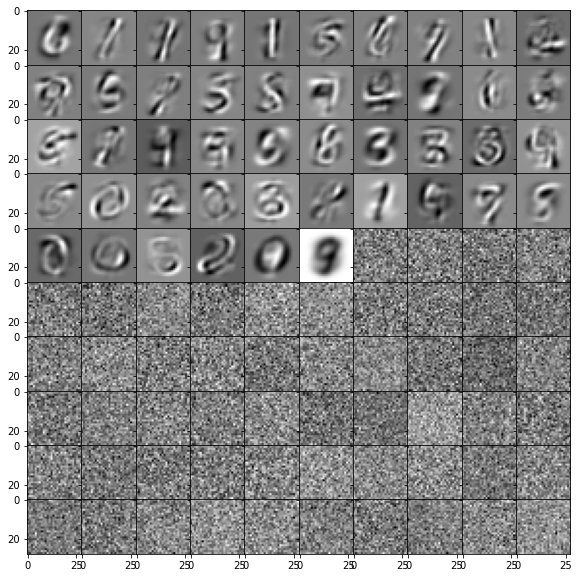

In [14]:
D_var = np.var(D_est, axis=0)
print(D_est.shape)
inds = np.argsort(D_var)[::-1]
best_100 = D_est[:, inds[:100]]
fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(10, 10),  # creates 2x2 grid of axes
                 axes_pad=0,  # pad between axes in inch.
                 )

for ax, im in zip(grid, best_100.T):
    # Iterating over the grid returns the Axes.
    ax.imshow(im.reshape(patch_shape), cmap='gray')
plt.show()


INFO:root:Entering sparse coding stage...
INFO:root:Sparse coding stage ended.


(784, 100) (784, 1) 0.0001


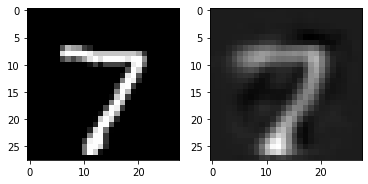

In [15]:
# Select image and add noise
img_corrupted = test_X[0] * np.random.binomial(1, 1, img.shape)

plt.imshow(img_corrupted)

# Convert image to patch matrix Y
patches = extract_patches_2d(img_corrupted, patch_shape)
Y = patches.reshape((len(patches), -1)).T
Y = Y / (np.linalg.norm(Y, axis=0) + 1e-6)

# Sparse code using learned dictionary
ksvd.sparse_coding(Y)
Y_est = (ksvd.dictionary.matrix @ ksvd.alphas).T
patches_est = Y_est.reshape((-1, patch_shape[0], patch_shape[1]))
img_est = reconstruct_from_patches_2d(patches_est, img_corrupted.shape)

plt.subplot(121)
plt.imshow(img_corrupted, cmap='gray')
plt.subplot(122)
plt.imshow(img_est, cmap='gray')

In [ ]:
from scipy.ndimage.filters import gaussian_filter

blurred = gaussian_filter(img_corrupted, sigma=0.7)
plt.imshow(blurred, cmap='gray')